# Latent Dirichlet Allocation

In [12]:
#import functions and load data
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

wdm = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0).iloc[:,4:100].astype(int)
wdm.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_225180\442594156.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  wdm = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0).iloc[:,4:100].astype(int)


,said,transgender,people,woman,school,gender,year,trans,state,child,...,place,house,saying,home,added,thing,legal,judge,minor,kid
0,0,46,0,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,22,0,0
1,0,38,9,6,0,15,6,7,0,1,...,0,0,1,0,0,0,14,0,0,0
2,0,36,21,0,0,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,31,2,0,12,12,10,0,19,8,...,0,0,0,0,3,0,0,0,1,1
4,0,35,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
results = []
vocab = list(wdm.columns)
wdm_arr = wdm.to_numpy()
num_topics = 6
lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                     max_iter=100, learning_method='online')
results += [lda_model_DH.fit_transform(wdm_arr)]
    
word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

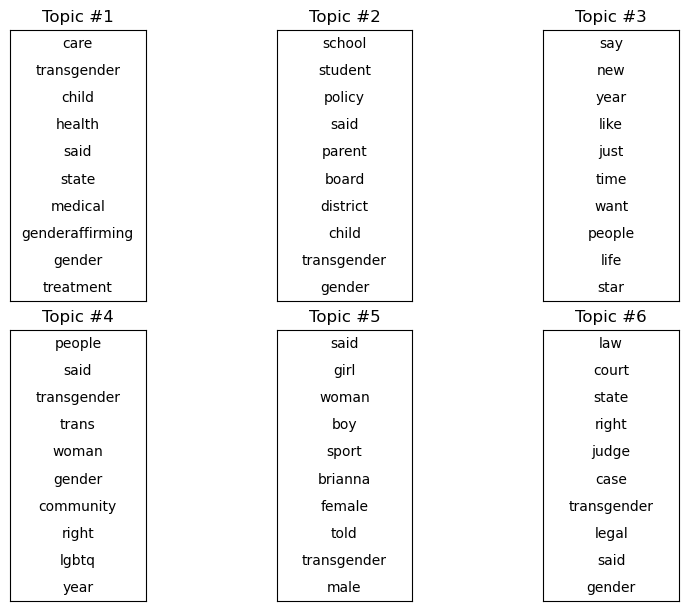

In [54]:
fontsize_base = 5
fig, ax = plt.subplots(2,3,layout='constrained',figsize=(8,6))
for i in range(2):
    for j in range(3):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_box_aspect(2)
        ax[i,j].set_title(label=('Topic #'+str(3*i+j+1)))
        top_words_idx = np.argsort(word_topic[:,3*i+j])[::-1]  # descending order
        top_words_idx = top_words_idx[:num_top_words]
        top_words = vocab_array[top_words_idx]
        top_words_shares = word_topic[top_words_idx, 3*i+j]
        for k, (word, share) in enumerate(zip(top_words, top_words_shares)):
            ax[i,j].text(0.5, (num_top_words-k)/10-.05, word,horizontalalignment='center', verticalalignment='center',transform=ax[i,j].transAxes)
plt.show()